In [2]:
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
col_names= ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
species= ['Setosa', 'Versicolor', 'Virginica']

train_path= tf.keras.utils.get_file('iris_training.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path= tf.keras.utils.get_file('iris_test.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')
#keras lee un csv y lo descarga con el nombre indicado

train= pd.read_csv(train_path, names=col_names, header=0)
test= pd.read_csv(test_path, names=col_names, header=0)

train_y= train.pop('Species')
test_y= test.pop('Species')
pd.concat([train, train_y],axis=1).head(5)
                 

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3
...,...,...,...,...
115,5.5,2.6,4.4,1.2
116,5.7,3.0,4.2,1.2
117,4.4,2.9,1.4,0.2
118,4.8,3.0,1.4,0.1


C:\Users\msaba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\msaba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\msaba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


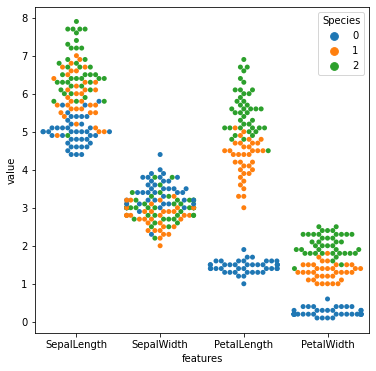

In [10]:
import seaborn as sns

data = pd.melt(pd.concat([train, train_y],axis=1), id_vars = 'Species', var_name = 'features',value_name = 'value')
data

plt.figure(figsize = (6,6))
sns.swarmplot(x = 'features', y = 'value', hue = 'Species', data = data)
plt.show()

<AxesSubplot:>

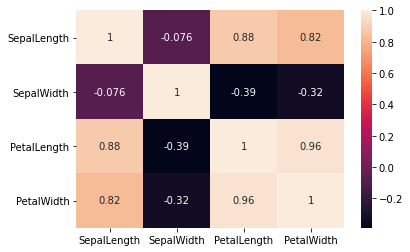

In [13]:
sns.heatmap(train.corr(), annot=True)

In [3]:
def input_fn(features, label, training=True, batch_size=256):
    data= tf.data.Dataset.from_tensor_slices((dict(features), label))
    
    if training:
        data= data.shuffle(1000).repeat()
        
    return data.batch(batch_size)

In [4]:
feature_columns= []

for key in train.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))

In [5]:
#se construye una red neural con 2 capas escondidas, con 30 y 10 nodos cada capa. esto es solo la carcaza de la red neural
classifier = tf.estimator.DNNClassifier(
    feature_columns= feature_columns,
    hidden_units= [30,10],
    n_classes=3) #el modelo elige entre 3 clases 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\msaba\\AppData\\Local\\Temp\\tmpmp7j0lpv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
classifier.train(
input_fn= lambda: input_fn(train,train_y, training=True),
    steps=8000) #steps es similar a epochs

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\msaba\AppData\Local\Temp\tmpmp7j0lpv\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.3332638, step = 0
INFO:tensorflow:global_step/sec: 312.797
INFO:tensorflow:loss = 1.0584118, step = 100 (0.320 sec)
INFO:tensorflow:global_step/sec: 415.397
INFO:tensorflow:loss = 0.9773916, step = 200 (0.256 sec)
IN

INFO:tensorflow:global_step/sec: 375.554
INFO:tensorflow:loss = 0.2931862, step = 7100 (0.251 sec)
INFO:tensorflow:global_step/sec: 297.012
INFO:tensorflow:loss = 0.28733432, step = 7200 (0.340 sec)
INFO:tensorflow:global_step/sec: 365.258
INFO:tensorflow:loss = 0.2814569, step = 7300 (0.271 sec)
INFO:tensorflow:global_step/sec: 389.877
INFO:tensorflow:loss = 0.28088248, step = 7400 (0.256 sec)
INFO:tensorflow:global_step/sec: 395.879
INFO:tensorflow:loss = 0.2787043, step = 7500 (0.253 sec)
INFO:tensorflow:global_step/sec: 426.786
INFO:tensorflow:loss = 0.2781492, step = 7600 (0.250 sec)
INFO:tensorflow:global_step/sec: 401.325
INFO:tensorflow:loss = 0.26866862, step = 7700 (0.234 sec)
INFO:tensorflow:global_step/sec: 399.322
INFO:tensorflow:loss = 0.26842868, step = 7800 (0.250 sec)
INFO:tensorflow:global_step/sec: 398.359
INFO:tensorflow:loss = 0.25938696, step = 7900 (0.251 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8000...
INFO:tensorflow:Saving che

In [7]:
eval_result= classifier.evaluate(
    input_fn= lambda: input_fn(test,test_y, training=False), 
    steps=1000)
#esta funcion requiere como input una funcion "input_fn", no el resultado de la misma, por eso se aplica una funcion lambda

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-27T18:31:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\msaba\AppData\Local\Temp\tmpmp7j0lpv\model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.67767s
INFO:tensorflow:Finished evaluation at 2021-11-27-18:31:04
INFO:tensorflow:Saving dict for global step 8000: accuracy = 0.96666664, average_loss = 0.30477193, global_step = 8000, loss = 0.30477193
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8000: C:\Users\msaba\AppData\Local\Temp\tmpmp7j0lpv\model.ckpt-8000


In [8]:
#print(eval_result)
print('Accuracy = {:.2f}%'.format(eval_result['accuracy']*100))

Accuracy = 96.67%


In [18]:
#para predecir una flor nueva

def input_fn2(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features= ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict= {}

print('please type numeric values as prompted')

for feature in features:
    valid = True
    while valid:
        val=input(feature + ':')
        val=val.replace(',','.')
        if not val.isdigit() or val.isdecimal(): valid=False
            
    predict[feature]=[float(val)] #por mas que sea un solo valor, es necesario que sea una lista
    
predictions = classifier.predict(input_fn= lambda:input_fn2(predict))

for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    
    print('prediction is {} and probaility is {:.2f}%'.format(species[class_id], probability*100))

please type numeric values as prompted
SepalLength:4
SepalWidth:5
PetalLength:6
PetalWidth:7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\msaba\AppData\Local\Temp\tmpmp7j0lpv\model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
prediction is Virginica and probaility is 98.96%


In [14]:
x=2
print(type(x))

y=float(x)
print(type(y))

<class 'int'>
<class 'float'>
